# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [24]:
import pandas as pd

from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [25]:
df = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [26]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,27,STL,59,56,27,25,3,152,...,3317,27,.482,8,107,-10.34,0,1,1,0
1,2,Frederik Andersen,28,TOR,66,66,38,21,5,182,...,3889,37,.561,8,94,12.06,0,1,1,2
2,3,Craig Anderson,36,OTT,58,55,23,25,6,180,...,3251,25,.455,11,116,-24.83,0,0,0,2
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,...,124,0,.000,0,NaN,NaN,0,0,0,0
4,5,Jonathan Bernier,29,COL,37,34,19,13,3,95,...,2001,18,.529,5,99,0.84,0,1,1,0


In [27]:
pd.set_option("max_rows", None)  # Affiche toute les lignes

df["SV%"] = pd.to_numeric(df["SV%"], errors='coerce').fillna(0)  # formate la colonne %SV en numérique et remplis les NaN par des 0
sortedGoalie = df.sort_values(by="SV%", ascending=False)

print(sortedGoalie[["Player", "W", "SV%"]].head(20))



               Player   W    SV%
27       Scott Foster   0  1.000
88        Adam Wilcox   0  1.000
51    Marek Langhamer   0  1.000
16        Oscar Dansk   3  0.946
3     Kenneth Appleby   0  0.945
37     Andrew Hammond   0  0.939
83      Linus Ullmark   1  0.935
60  Curtis McElhinney  11  0.934
43      Carter Hutton  17  0.931
70       Antti Raanta  21  0.930
15     Corey Crawford  16  0.929
56     Roberto Luongo  18  0.929
62        Ryan Miller  12  0.928
25  Marc-Andre Fleury  29  0.927
73        Pekka Rinne  42  0.927
5          Reto Berra   1  0.926
30        John Gibson  31  0.926
75        Juuse Saros  11  0.925
38  Connor Hellebuyck  44  0.924
11      Jack Campbell   2  0.924


Student : Un problème apparait clairement puisqu'on ne prends pas en compte les victoires des goal.
On devrait trier les goals par victoire puis par SV%.

Question 2:

In [28]:
df["W"] = pd.to_numeric(df["W"], errors='coerce')
reSortedGoalie = df.sort_values(by=["W", "SV%"], ascending=False)

print(reSortedGoalie[["Player", "W", "SV%"]].head(20))

                Player   W    SV%
38   Connor Hellebuyck  44  0.924
85  Andrei Vasilevskiy  44  0.920
73         Pekka Rinne  42  0.927
1    Frederik Andersen  38  0.918
8     Sergei Bobrovsky  37  0.921
22        Devan Dubnyk  35  0.918
71         Tuukka Rask  34  0.917
40       Braden Holtby  34  0.907
69      Jonathan Quick  33  0.921
30         John Gibson  31  0.926
81          Cam Talbot  31  0.908
46        Martin Jones  30  0.915
25   Marc-Andre Fleury  29  0.927
63         Matt Murray  27  0.907
0           Jake Allen  27  0.906
7           Ben Bishop  26  0.916
55    Henrik Lundqvist  26  0.915
48       Keith Kinkaid  26  0.913
78          Mike Smith  25  0.916
84     Semyon Varlamov  24  0.920


Graphique

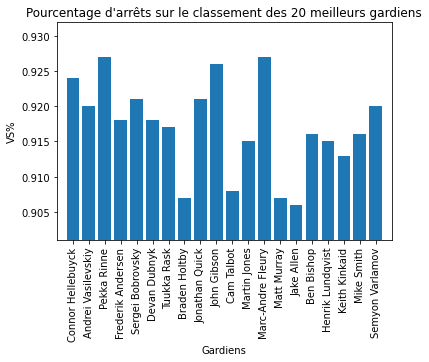

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
#print(reSortedGoalie[["Player", "SV%"]][:20])
histo = plt.bar(x, height=reSortedGoalie["SV%"][:20])
plt.xticks(x, reSortedGoalie["Player"][:20], rotation=90)
plt.axis([-1, 20, min(reSortedGoalie["SV%"][:20])-0.005, max(reSortedGoalie["SV%"][:20])+0.005])
plt.title("Pourcentage d'arrêts sur le classement des 20 meilleurs gardiens")
plt.xlabel("Gardiens")
plt.ylabel("VS%")
plt.show()
